In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

ROOT_PATH = Path('/mnt/2021_NIA_data/projects/nbb')
VIDEO_PATH = ROOT_PATH.joinpath("video")
HEADPOSE_PATH = VIDEO_PATH.joinpath("headpose_data")

# Determine the project path based on the current working directory or the script's path
try:
    PROJECT_PATH = Path(__file__).parents[1]
except NameError:
    PROJECT_PATH = Path(os.getcwd()).parents[0]

FIGURE_PATH = Path(PROJECT_PATH, "figures")

In [7]:
# Read the CSV file
data = pd.read_csv(str(Path(HEADPOSE_PATH, "headpose_values.csv")))

# Group the data by participant_id
grouped_data = data.groupby('participant_id')

In [8]:
print("Number of participants:", len(grouped_data))
print("Participant IDs:", grouped_data.groups.keys())

Number of participants: 4
Participant IDs: dict_keys(['td001', 'td002', 'td005', 'td006'])


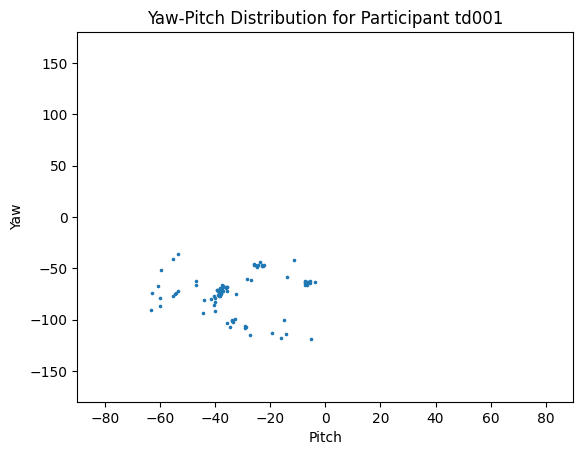

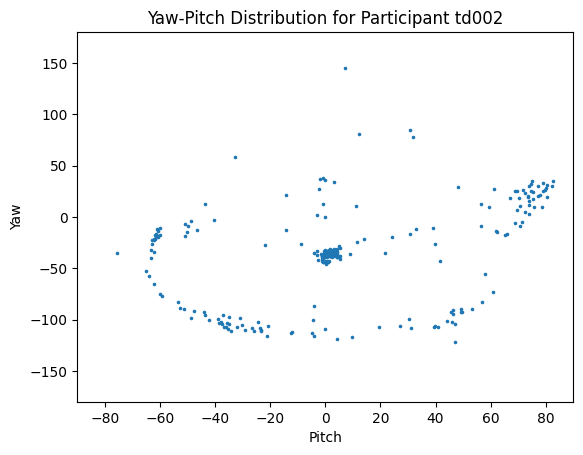

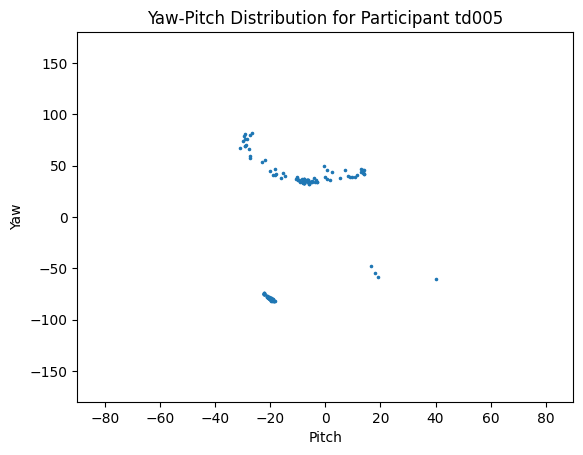

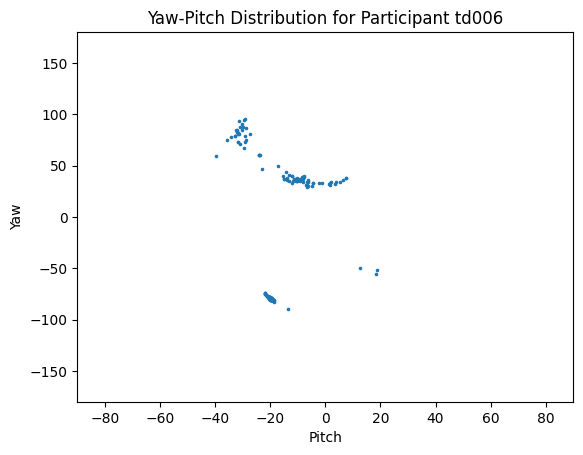

In [9]:
for participant_id, participant_data in grouped_data:
    # Extract yaw and pitch values for the current participant
    yaw_values = participant_data['yaw']
    pitch_values = participant_data['pitch']

    # Create the Cartesian scatter plot for the current participant
    fig, ax = plt.subplots()
    ax.scatter(pitch_values, yaw_values, marker='.', s=10)
    
    # Set the range of x and y values
    ax.set_xlim(-90, 90)
    ax.set_ylim(-180, 180)

    # Set labels and title
    ax.set_title(f'Yaw-Pitch Distribution for Participant {participant_id}')
    ax.set_xlabel('Pitch')
    ax.set_ylabel('Yaw')

    # Save the scatter plot for the current participant as an image file (optional)
    plt.savefig(str(Path(FIGURE_PATH, f'participant_{participant_id}_scatter_plot.png')))

    # Display the scatter plot for the current participant
    plt.show()

In [ ]:
# # polar scatter plot

# for participant_id, participant_data in grouped_data:
#     # Extract yaw and pitch values for the current participant
#     yaw_values = participant_data['yaw']
#     pitch_values = participant_data['pitch']
    
#     # Convert yaw values from degrees to radians for polar plot
#     yaw_radians = np.radians(yaw_values)

#     # Create the polar scatter plot for the current participant
#     fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#     ax.scatter(yaw_radians, pitch_values, marker='.', s=10)
#     ax.set_theta_zero_location('N')  # Set the zero (north) to the top
#     ax.set_theta_direction(-1)  # Set the direction of rotation to clockwise
#     ax.set_ylim(-90, 90)  # Set the range of radial values
    
#     # Set labels and title
#     ax.set_title(f'Yaw-Pitch Distribution for Participant {participant_id}')
#     ax.set_xlabel('Yaw')
#     ax.set_ylabel('Pitch', labelpad=20)

#     # Save the scatter plot for the current participant as an image file (optional)
#     plt.savefig(str(Path(FIGURE_PATH, f'participant_{participant_id}_polar_scatter_plot.png')))

#     # Display the scatter plot for the current participant
#     plt.show()